Accuracy: 0.8380
ROC AUC Score: 0.8999

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[95 10]
 [19 55]]

Feature Importance:
      feature  importance
5    Sex_male    0.381786
4        Fare    0.212278
1         Age    0.170967
0      Pclass    0.108460
2       SibSp    0.054585
3       Parch    0.035529
7  Embarked_S    0.026552
6  Embarked_Q    0.009843


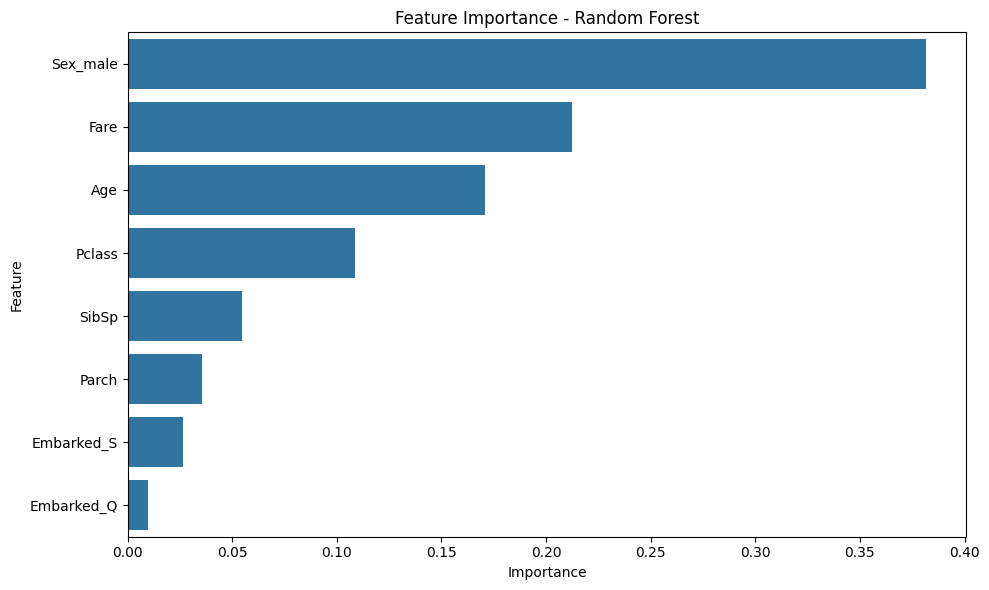

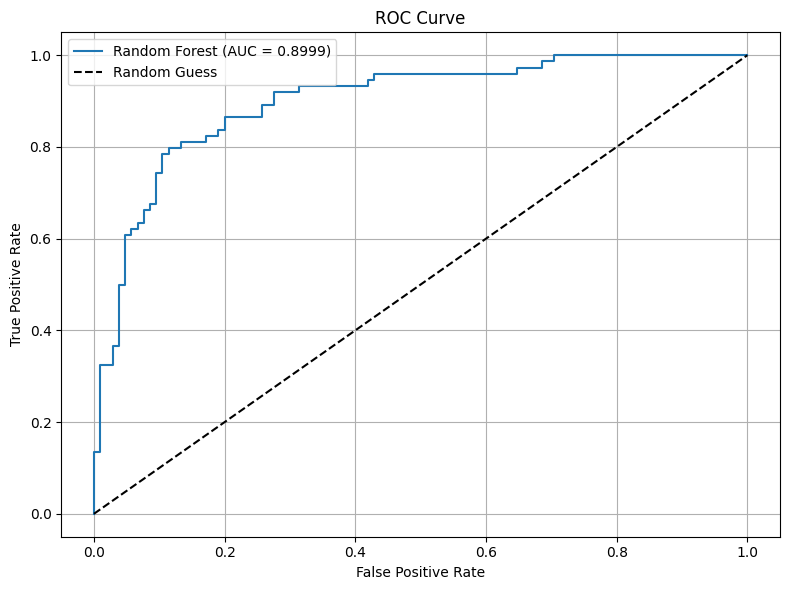

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('train.csv')

# Select the features and the target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

x = df[features]
y = df['Survived']

# Fill missing values
x.loc[:, 'Age'] = x['Age'].fillna(x['Age'].median())
x.loc[:, 'Embarked'] = x['Embarked'].fillna(x['Embarked'].mode()[0])
x.loc[:, 'Fare'] = x['Fare'].fillna(x['Fare'].median())

# Encode categorical data
x = pd.get_dummies(x, drop_first=True)

# Train and split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data (optional for Random Forest, but can help)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in leaf node
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(x_test_scaled)
y_prob = rf_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()